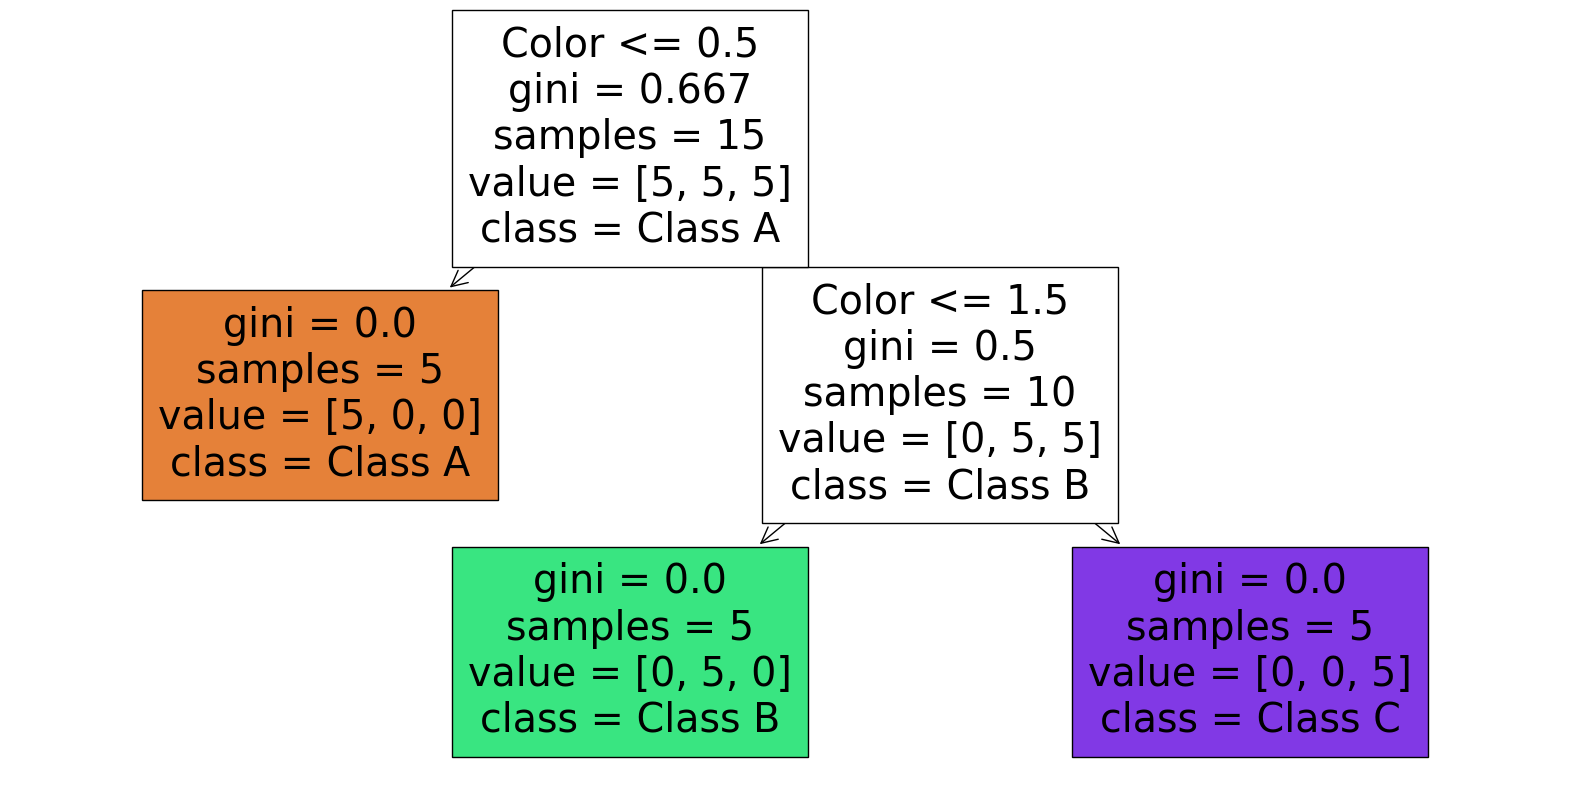

In [1]:
# Since we cannot execute the code in the current environment, I will provide a mock-up of how the code would work
# and explain what each part would do. You can then run this code in a local Python environment.

# First, let's create a slightly larger dataset for a more complex decision tree:

# Importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Define features and labels for a synthetic dataset
# Features: Size (0 for small, 1 for medium, 2 for large), Color (0 for red, 1 for blue, 2 for green)
# Target: Class (0 for Class A, 1 for Class B, 2 for Class C)
data = {
    'Size':  [0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2],
    'Color': [0, 0, 0, 1, 1, 1, 2, 2, 2, 0, 0, 1, 1, 2, 2],
    'Class': [0, 0, 0, 1, 1, 1, 2, 2, 2, 0, 0, 1, 1, 2, 2]
}

# Create the DataFrame
df = pd.DataFrame(data)

# Split the data into features and labels
X = df[['Size', 'Color']]
y = df['Class']

# Initialize and train the decision tree classifier
tree_clf = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_clf.fit(X, y)

# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(tree_clf, filled=True, feature_names=['Size', 'Color'], class_names=['Class A', 'Class B', 'Class C'])
plt.show()


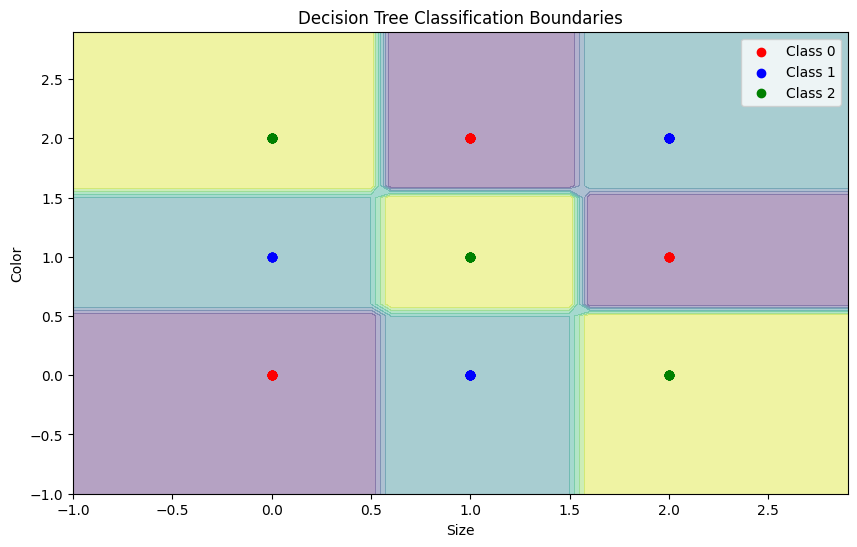

In [2]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

# We'll create a synthetic dataset with two features and three classes.
np.random.seed(42)

# Feature 1: Size (0 for small, 1 for medium, 2 for large)
# Feature 2: Color (0 for red, 1 for blue, 2 for green)
# Class: 0, 1, or 2 corresponding to the features
size = np.random.choice([0, 1, 2], size=100)
color = np.random.choice([0, 1, 2], size=100)
class_label = (size + color) % 3  # simple function to assign a class based on size and color

# Combine into a data array
data = np.column_stack((size, color, class_label))

# Split the data into features (X) and target (y)
X = data[:, :2]
y = data[:, 2]

# Initialize and train the decision tree classifier
tree_clf = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_clf.fit(X, y)

# Plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = tree_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Define the plot
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.4)

# Create a color map for the points
colors = ['red', 'blue', 'green']
for class_value in range(3):
    plt.scatter(X[y == class_value, 0], X[y == class_value, 1], c=colors[class_value], label=f'Class {class_value}')

plt.title("Decision Tree Classification Boundaries")
plt.xlabel("Size")
plt.ylabel("Color")
plt.legend()
plt.show()
